<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Classification_in_Healthcare_Visualizing_K_Nearest_Neighbors_and_Decision_Boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

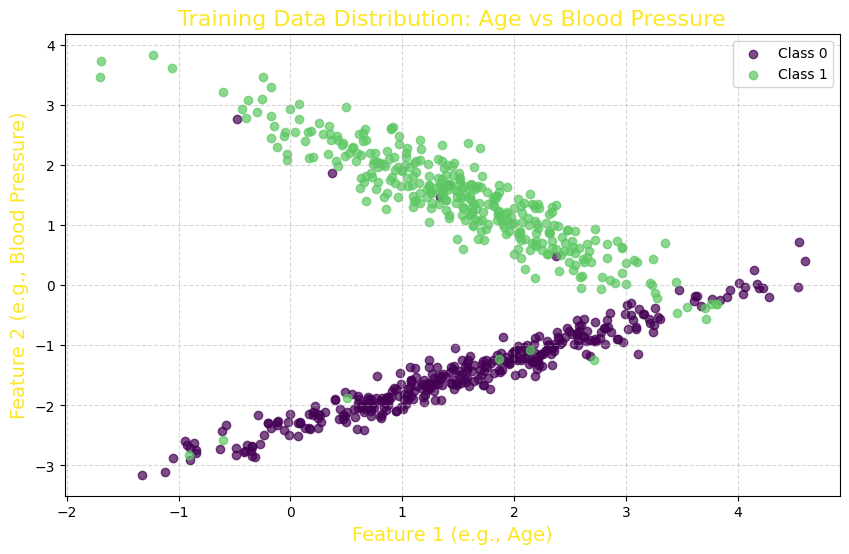

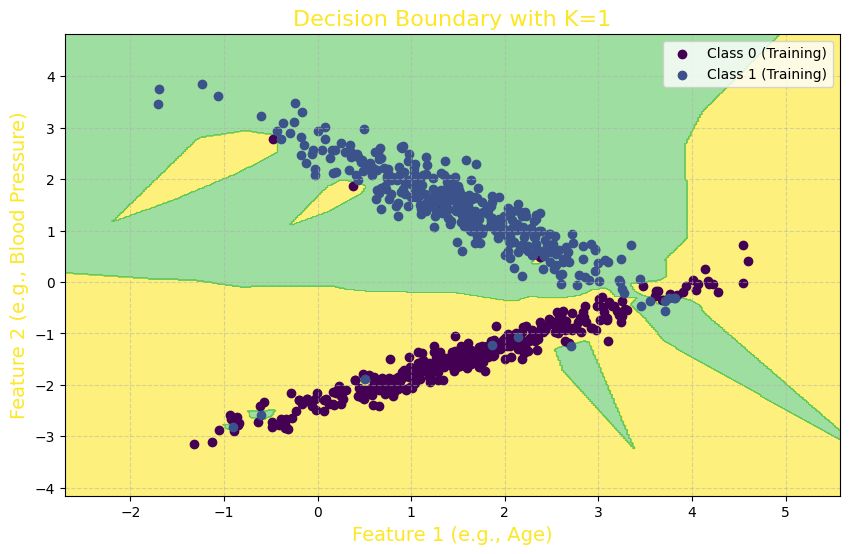

K=1
Training Accuracy: 1.00
Test Accuracy: 0.95
Confusion Matrix (Test Data):
[[139   9]
 [  6 146]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       148
           1       0.94      0.96      0.95       152

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



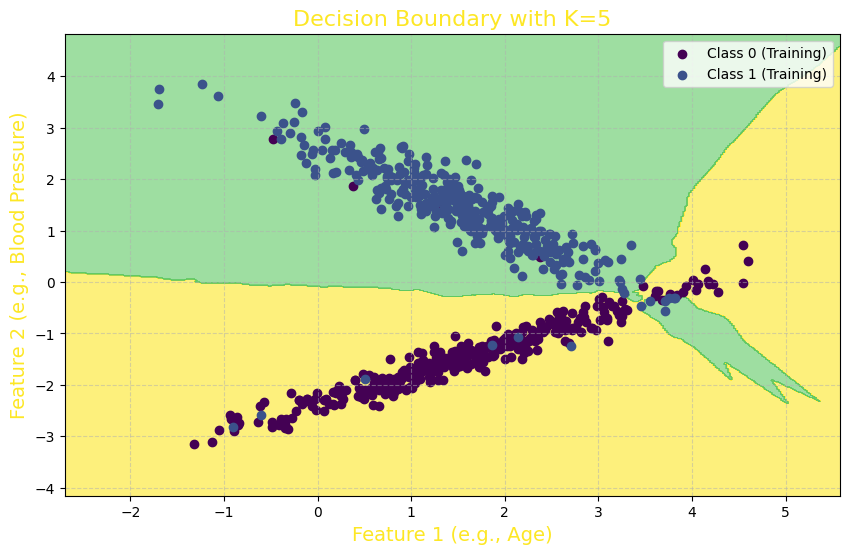

K=5
Training Accuracy: 0.98
Test Accuracy: 0.97
Confusion Matrix (Test Data):
[[143   5]
 [  3 149]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       148
           1       0.97      0.98      0.97       152

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



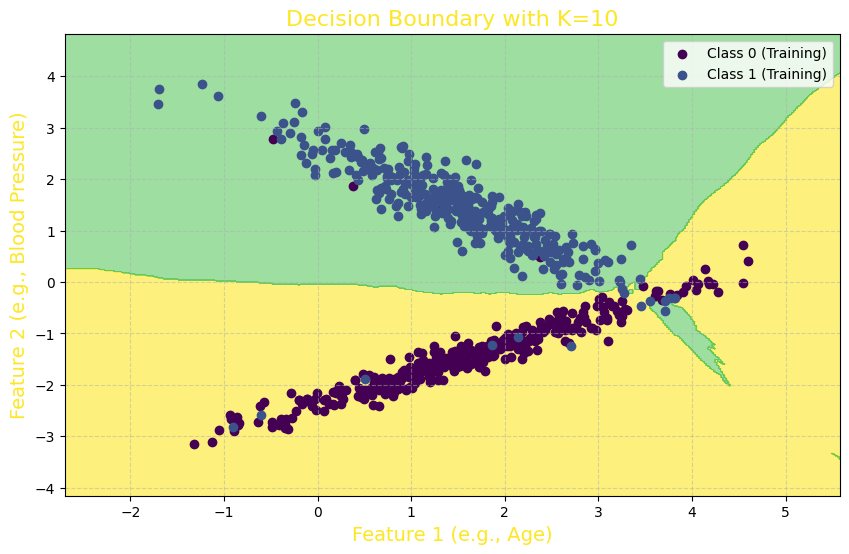

K=10
Training Accuracy: 0.97
Test Accuracy: 0.97
Confusion Matrix (Test Data):
[[143   5]
 [  5 147]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       148
           1       0.97      0.97      0.97       152

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



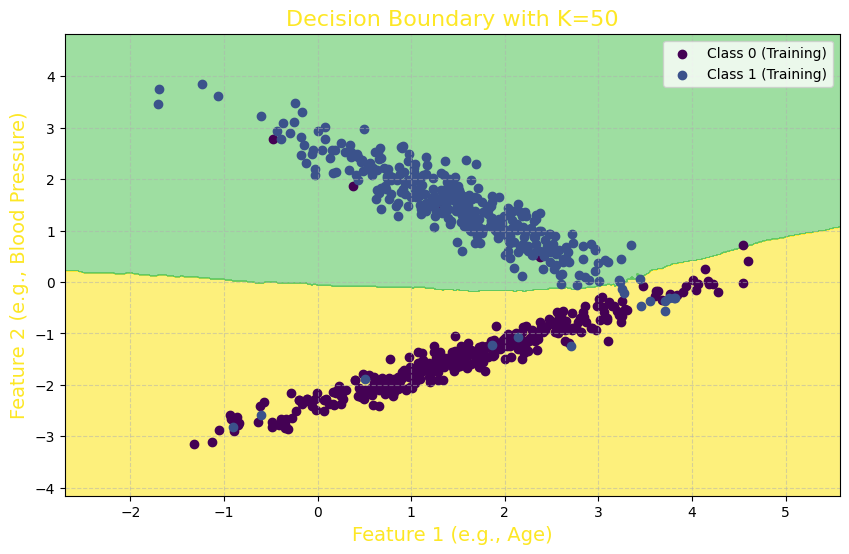

K=50
Training Accuracy: 0.97
Test Accuracy: 0.97
Confusion Matrix (Test Data):
[[143   5]
 [  5 147]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       148
           1       0.97      0.97      0.97       152

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



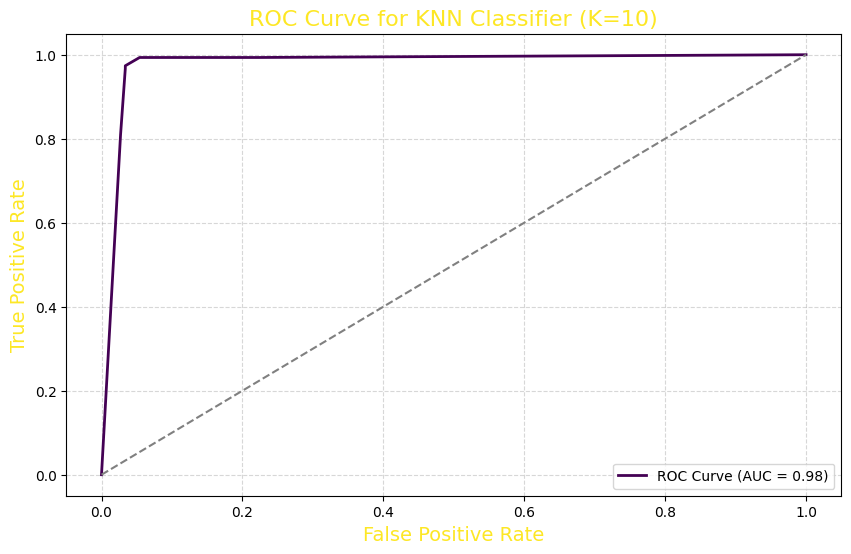

In [1]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from matplotlib.colors import ListedColormap

# I want to create a simulated dataset for a classification problem in healthcare.
# My dataset will include two predictors, such as 'age' and 'blood pressure,' and a binary outcome.
# I will use this dataset to explore the KNN algorithm and classification techniques.
X, y = make_classification(
    n_samples=1000,  # I want 1000 samples to ensure enough data for training and testing
    n_features=2,    # I’m using two predictors for easy visualization
    n_informative=2, # Both predictors should be informative
    n_redundant=0,   # I don’t want any redundant features
    n_clusters_per_class=1,
    flip_y=0.03,     # Adding some noise to make it realistic
    class_sep=1.5,   # I want a good separation between classes
    random_state=42
)

# I split my dataset into training and test sets so that I can evaluate model performance later.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# I will now visualize my training data to understand the distribution of classes.
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='#440154FF', label='Class 0', alpha=0.7)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='#5DC863FF', label='Class 1', alpha=0.7)
plt.title('Training Data Distribution: Age vs Blood Pressure', fontsize=16, color='#FDE725FF')
plt.xlabel('Feature 1 (e.g., Age)', fontsize=14, color='#FDE725FF')
plt.ylabel('Feature 2 (e.g., Blood Pressure)', fontsize=14, color='#FDE725FF')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# I want to train a KNN classifier and explore the decision boundaries it creates.
# I’ll start by using k=1, the simplest form of KNN.
k_values = [1, 5, 10, 50]  # I’m testing multiple k values to observe how the decision boundary changes.

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Now I’ll visualize the decision boundary created by the KNN classifier.
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # I use a custom colormap to make the visualization more appealing.
    cmap_light = ListedColormap(['#FDE725FF', '#5DC863FF'])
    cmap_bold = ['#440154FF', '#3B528BFF']

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color=cmap_bold[0], label='Class 0 (Training)')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color=cmap_bold[1], label='Class 1 (Training)')
    plt.title(f'Decision Boundary with K={k}', fontsize=16, color='#FDE725FF')
    plt.xlabel('Feature 1 (e.g., Age)', fontsize=14, color='#FDE725FF')
    plt.ylabel('Feature 2 (e.g., Blood Pressure)', fontsize=14, color='#FDE725FF')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # I also want to evaluate the classifier's accuracy for each k value.
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    print(f'K={k}')
    print(f'Training Accuracy: {accuracy_score(y_train, y_pred_train):.2f}')
    print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test):.2f}')
    print('Confusion Matrix (Test Data):')
    print(confusion_matrix(y_test, y_pred_test))
    print('\nClassification Report (Test Data):')
    print(classification_report(y_test, y_pred_test))

# I now want to explore the ROC curve and AUC score for a selected KNN model (e.g., k=10).
knn_best = KNeighborsClassifier(n_neighbors=10)
knn_best.fit(X_train, y_train)

# I’ll calculate the probabilities and plot the ROC curve.
y_proba = knn_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#440154FF', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for KNN Classifier (K=10)', fontsize=16, color='#FDE725FF')
plt.xlabel('False Positive Rate', fontsize=14, color='#FDE725FF')
plt.ylabel('True Positive Rate', fontsize=14, color='#FDE725FF')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
